This project uses [this](https://www.kaggle.com/datasets/pentakrishnakishore/diabetes-csv) diabetes dataset to come up with a model to predict whether someone has diabetes or not.

# Import data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Clean data

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


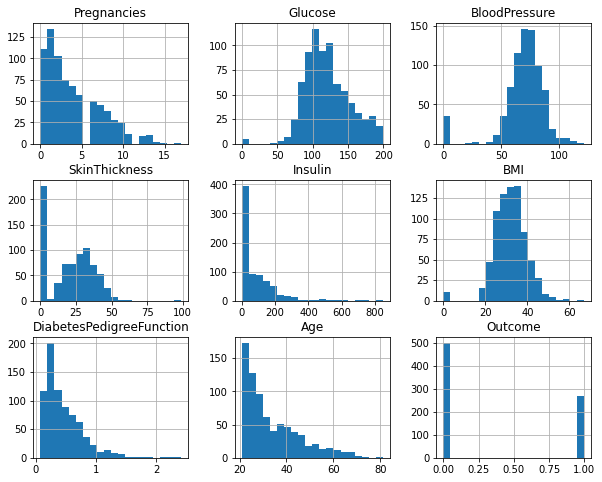

In [5]:
df.hist(bins=20, figsize=(10, 8))
plt.show()

It looks like there's values that are 0 that shouldn't be. Let's investigate.

In [6]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

I'll replace the 0s with NaN for the columns that shouldn't have values of 0.

In [7]:
nonzero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [8]:
df[nonzero_cols] = df[nonzero_cols].replace(0, np.nan)

Now I'll check for outliers.

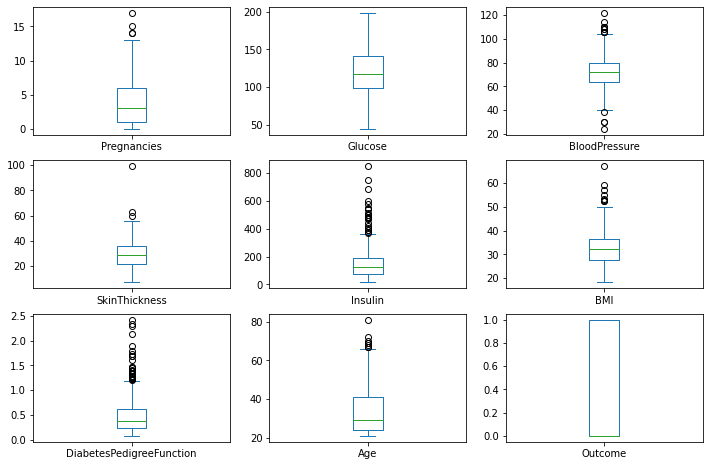

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))

for i, col in enumerate(df.columns):
    df[col].plot(kind='box', ax=axes[i // 3, i % 3])

In [10]:
df[(df['SkinThickness'] > 80) | (df['Insulin'] > 600) | (df['BMI'] > 60) | (df['Age'] > 75)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23,0
459,9,134.0,74.0,33.0,60.0,25.9,0.460,81,0
579,2,197.0,70.0,99.0,NaN,34.7,0.575,62,1


In [11]:
# drop extreme outliers
df = df.drop(df[(df['SkinThickness'] > 80) | (df['Insulin'] > 600) | (df['BMI'] > 60) | (df['Age'] > 75)].index)

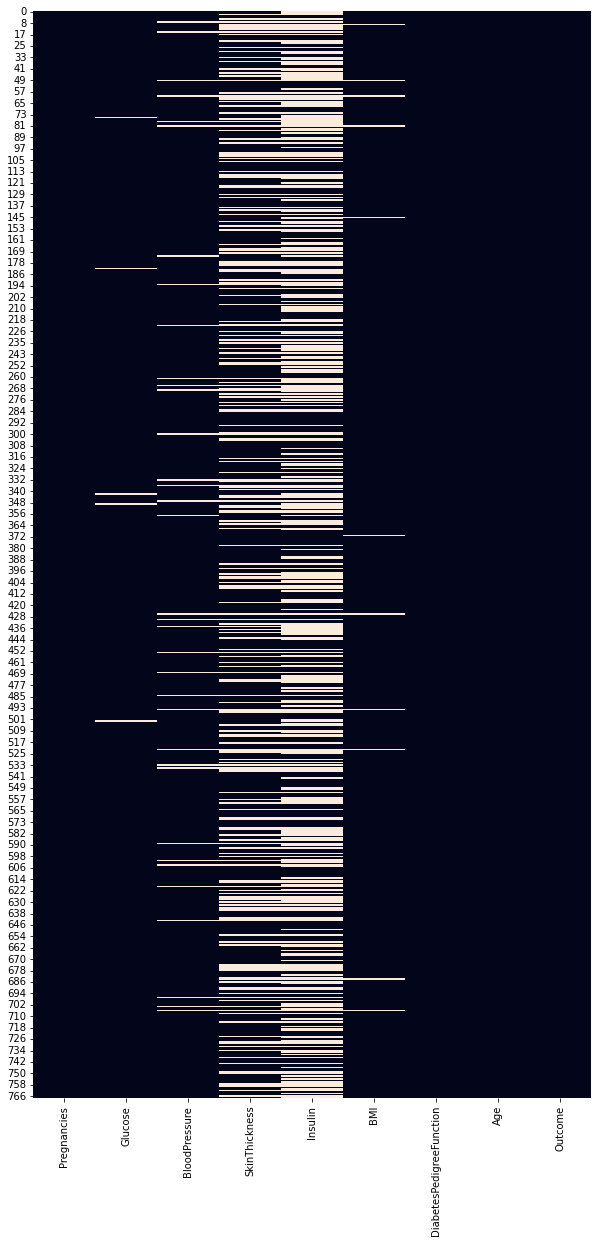

In [12]:
# visualize where the missing values are (white is missing)
plt.figure(figsize = (10, 20))
ax = sns.heatmap(df.isnull(), cbar=None)

In [13]:
# drop rows with missing values for variables with few missing values
df = df.dropna(subset = ['Glucose', 'BloodPressure', 'BMI'])

In [14]:
# replace remaining missing values with the mean
df = df.fillna(df.mean())

I also want to see if there is multicollinearity between the predictors

In [15]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

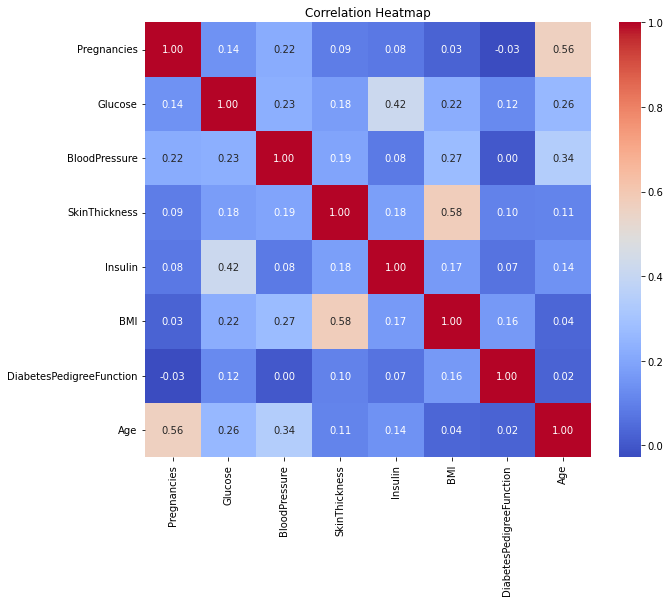

In [16]:
# Calculate the correlation heatmap
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Split data into train/test

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Create models

## Logistic regression

In [18]:
from sklearn.linear_model import LogisticRegression
logi_model = LogisticRegression(random_state=20)
logi_model.fit(X_train, y_train)

C:\Users\bliu9\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=20)

## Decision tree classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
tree_model = DecisionTreeClassifier(random_state=20)

# Define hyperparameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_tree_model = grid_search.best_estimator_

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Cross-Validation Score: 0.7410256410256411


## Neural network

In [20]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

X_training, X_val, y_training, y_val = train_test_split(X_train_scaled, y_train, test_size=0.1, random_state=20)
nn_model.fit(X_train_scaled, y_train, epochs=50, verbose = 2, validation_data=[X_val, y_val])

Epoch 1/50
18/18 - 3s - loss: 0.6170 - accuracy: 0.6969 - val_loss: 0.4825 - val_accuracy: 0.7414 - 3s/epoch - 162ms/step
Epoch 2/50
18/18 - 0s - loss: 0.4969 - accuracy: 0.7561 - val_loss: 0.3969 - val_accuracy: 0.8103 - 144ms/epoch - 8ms/step
Epoch 3/50
18/18 - 0s - loss: 0.4596 - accuracy: 0.7700 - val_loss: 0.3723 - val_accuracy: 0.8276 - 163ms/epoch - 9ms/step
Epoch 4/50
18/18 - 0s - loss: 0.4456 - accuracy: 0.7875 - val_loss: 0.3593 - val_accuracy: 0.8103 - 154ms/epoch - 9ms/step
Epoch 5/50
18/18 - 0s - loss: 0.4381 - accuracy: 0.7822 - val_loss: 0.3561 - val_accuracy: 0.7931 - 142ms/epoch - 8ms/step
Epoch 6/50
18/18 - 0s - loss: 0.4283 - accuracy: 0.7857 - val_loss: 0.3563 - val_accuracy: 0.8103 - 140ms/epoch - 8ms/step
Epoch 7/50
18/18 - 0s - loss: 0.4229 - accuracy: 0.7875 - val_loss: 0.3417 - val_accuracy: 0.8276 - 140ms/epoch - 8ms/step
Epoch 8/50
18/18 - 0s - loss: 0.4170 - accuracy: 0.7927 - val_loss: 0.3445 - val_accuracy: 0.8103 - 161ms/epoch - 9ms/step
Epoch 9/50
18/18 

# Evaluate models

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def eval(y_pred):
    # Evaluate the predictions
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_rep)

## Logistic regression

In [22]:
y_pred = logi_model.predict(X_test)
eval(y_pred)

Accuracy: 0.78

Confusion Matrix:
[[89 11]
 [21 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       100
           1       0.68      0.52      0.59        44

    accuracy                           0.78       144
   macro avg       0.74      0.71      0.72       144
weighted avg       0.77      0.78      0.77       144



## Decision tree

In [23]:
y_pred = best_tree_model.predict(X_test)
eval(y_pred)

Accuracy: 0.88

Confusion Matrix:
[[94  6]
 [12 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       100
           1       0.84      0.73      0.78        44

    accuracy                           0.88       144
   macro avg       0.86      0.83      0.85       144
weighted avg       0.87      0.88      0.87       144



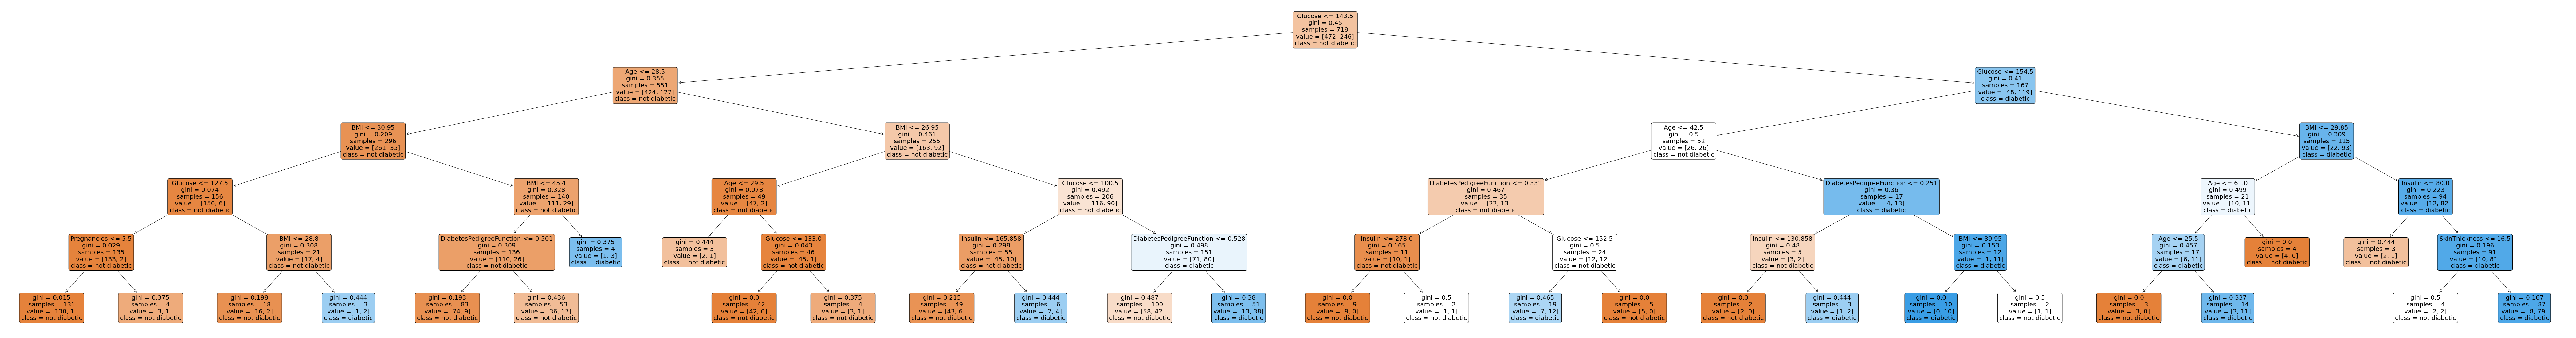

In [24]:
# Display decision tree (zoom for details)
from sklearn.tree import plot_tree

plt.figure(figsize=(150, 20))
plot_tree(best_tree_model, feature_names=X.columns, 
          class_names=['not diabetic', 'diabetic'], 
          rounded = True, fontsize=20, filled=True)
plt.show()

## Neural network

In [25]:
y_pred = (nn_model.predict(X_test_scaled) > 0.5).astype(int)
eval(y_pred)

5/5 [==============================] - 0s 4ms/step
Accuracy: 0.74

Confusion Matrix:
[[80 20]
 [17 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       100
           1       0.57      0.61      0.59        44

    accuracy                           0.74       144
   macro avg       0.70      0.71      0.70       144
weighted avg       0.75      0.74      0.75       144



# Conclusion

The decision tree model gives the best accuracy out of the three models. The model also provides interpretability. Plus, the decision tree model has the lowest false negative rate at 0.27.